In [19]:
import os, math, subprocess
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# some settings for displaying Pandas results
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.precision', 4)
pd.set_option('display.max_colwidth', -1)

In [20]:
def exploring_stats(pdf_input):
    # check rows, cols
    total_records = pdf_input.shape[0]
    total_columns = pdf_input.shape[1]
    print("Total records:", total_records)
    print("Total columns:", total_columns)

    # check dtypes
    name = []
    sub_type = []
    for n, t in pdf_input.dtypes.iteritems():
        name.append(n)
        sub_type.append(t)

    # check distinct
    ls_ndist = []
    for cname in pdf_input.columns:
        ndist = pdf_input[cname].nunique()
        pct_dist = ndist * 100.0 / total_records
        ls_ndist.append("{} ({:0.2f}%)".format(ndist, pct_dist))

    # check missing
    ls_nmiss = []
    for cname in pdf_input.columns:
        nmiss = pdf_input[cname].isnull().sum()
        pct_miss = nmiss * 100.0 / total_records
        ls_nmiss.append("{} ({:0.2f}%)".format(nmiss, pct_miss))

    # check zeros
    ls_zeros = []
    for cname in pdf_input.columns:
        try:
            nzeros = (pdf_input[cname] == 0).sum()
            pct_zeros = nzeros * 100.0 / total_records
            ls_zeros.append("{} ({:0.2f}%)".format(nzeros, pct_zeros))
        except:
            ls_zeros.append("{} ({:0.2f}%)".format(0, 0))
            continue

    # check negative
    ls_neg = []
    for cname in pdf_input.columns:
        try:
            nneg = (pdf_input[cname].astype("float") < 0).sum()
            pct_neg = nneg * 100.0 / total_records
            ls_neg.append("{} ({:0.2f}%)".format(nneg, pct_neg))
        except:
            ls_neg.append("{} ({:0.2f}%)".format(0, 0))
            continue

    # prepare output
    data = {
        "name": name,
        "sub_type": sub_type,
        "n_distinct": ls_ndist,
        "n_miss": ls_nmiss,
        "n_zeros": ls_zeros,
        "n_negative": ls_neg,
    }

    # check stats
    pdf_stats = pdf_input.describe().transpose()
    ls_stats = []
    for stat in pdf_stats.columns:
        data[stat] = []
        for cname in pdf_input.columns:
            try:
                data[stat].append(pdf_stats.loc[cname, stat])
            except:
                data[stat].append(0.0)

    # take samples
    nsample = 10
    pdf_sample = pdf_input.sample(frac=.5).head(nsample).transpose()
    pdf_sample.columns = ["sample_{}".format(i) for i in range(nsample)]

    # output
    col_ordered = ["sub_type", "n_distinct", "n_miss", "n_negative", "n_zeros",
                   "25%", "50%", "75%", "count", "max", "mean", "min", "std"] + list(pdf_sample.columns)
    pdf_data = pd.DataFrame(data).set_index("name")
    pdf_data = pd.concat([pdf_data, pdf_sample], axis=1)
    pdf_data = pdf_data[col_ordered]

    return pdf_data

In [23]:
%%time
# ls_report = {}
# for f in ls_files:
#     print("Exploring {}".format(f))
#     data_path = os.path.join("home-credit-default-risk", f)
#     pdf_data = pd.read_csv(data_path)
#     ls_report[f] = exploring_stats(pdf_data)
#     display(ls_report[f])
print("Exploring: {}".format("csv"))
data_path = os.path.join("home-credit-default-risk","application_train.csv")
pdf_data = pd.read_csv(data_path)
ls       = exploring_stats(pdf_data)
display(ls)
ls.to_csv('report_application_train.csv')

Exploring: csv
Total records: 307511
Total columns: 122


,sub_type,n_distinct,n_miss,n_negative,n_zeros,25%,50%,75%,count,max,mean,min,std,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9
name,,,,,,,,,,,,,,,,,,,,,,,
SK_ID_CURR,int64,307511 (100.00%),0 (0.00%),0 (0.00%),0 (0.00%),189145.5000,278202.0000,367142.5000,307511.0,4.5626e+05,2.7818e+05,1.0000e+05,102790.1753,232140,257643,228782,303155,389153,241984,182516,141246,315010,142824
TARGET,int64,2 (0.00%),0 (0.00%),0 (0.00%),282686 (91.93%),0.0000,0.0000,0.0000,307511.0,1.0000e+00,8.0729e-02,0.0000e+00,0.2724,0,0,0,0,0,0,0,0,0,1
NAME_CONTRACT_TYPE,object,2 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),0.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans
CODE_GENDER,object,3 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),0.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000,F,M,F,F,F,F,F,M,M,F
FLAG_OWN_CAR,object,2 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),0.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000,Y,N,N,N,N,Y,Y,N,N,N
FLAG_OWN_REALTY,object,2 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),0.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000,Y,Y,Y,Y,Y,Y,Y,N,Y,Y
CNT_CHILDREN,int64,15 (0.00%),0 (0.00%),0 (0.00%),215371 (70.04%),0.0000,0.0000,1.0000,307511.0,1.9000e+01,4.1705e-01,0.0000e+00,0.7221,1,0,0,0,0,1,2,0,0,0
AMT_INCOME_TOTAL,float64,2548 (0.83%),0 (0.00%),0 (0.00%),0 (0.00%),112500.0000,147150.0000,202500.0000,307511.0,1.1700e+08,1.6880e+05,2.5650e+04,237123.1463,4.05e+05,1.8e+05,1.215e+05,2.025e+05,1.215e+05,1.53e+05,1.8e+05,2.07e+05,1.575e+05,2.16e+05
AMT_CREDIT,float64,5603 (1.82%),0 (0.00%),0 (0.00%),0 (0.00%),270000.0000,513531.0000,808650.0000,307511.0,4.0500e+06,5.9903e+05,4.5000e+04,402490.7770,1.525e+06,4.863e+05,8.356e+05,2.844e+05,3.023e+05,1.962e+05,2.7e+05,1.125e+06,1.288e+06,7.008e+05


Wall time: 26.7 s


In [52]:
# load train data profile
data_path = "home-credit-default-risk/application_train.csv"
pdf_data = pd.read_csv(data_path)
pdf_data.head()
pdf_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=122)

In [26]:
# load meta data
meta_path = "report_application_train.csv"
pdf_meta = pd.read_csv(meta_path)
pdf_meta

,name,sub_type,n_distinct,n_miss,n_negative,n_zeros,25%,50%,75%,count,max,mean,min,std,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9
0,SK_ID_CURR,int64,307511 (100.00%),0 (0.00%),0 (0.00%),0 (0.00%),189145.5000,278202.0000,367142.5000,307511.0,4.5626e+05,2.7818e+05,1.0000e+05,102790.1753,232140,257643,228782,303155,389153,241984,182516,141246,315010,142824
1,TARGET,int64,2 (0.00%),0 (0.00%),0 (0.00%),282686 (91.93%),0.0000,0.0000,0.0000,307511.0,1.0000e+00,8.0729e-02,0.0000e+00,0.2724,0,0,0,0,0,0,0,0,0,1
2,NAME_CONTRACT_TYPE,object,2 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),0.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans
3,CODE_GENDER,object,3 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),0.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000,F,M,F,F,F,F,F,M,M,F
4,FLAG_OWN_CAR,object,2 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),0.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000,Y,N,N,N,N,Y,Y,N,N,N
5,FLAG_OWN_REALTY,object,2 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),0.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000,Y,Y,Y,Y,Y,Y,Y,N,Y,Y
6,CNT_CHILDREN,int64,15 (0.00%),0 (0.00%),0 (0.00%),215371 (70.04%),0.0000,0.0000,1.0000,307511.0,1.9000e+01,4.1705e-01,0.0000e+00,0.7221,1,0,0,0,0,1,2,0,0,0
7,AMT_INCOME_TOTAL,float64,2548 (0.83%),0 (0.00%),0 (0.00%),0 (0.00%),112500.0000,147150.0000,202500.0000,307511.0,1.1700e+08,1.6880e+05,2.5650e+04,237123.1463,405000.0,180000.0,121500.0,202500.0,121500.0,153000.0,180000.0,207000.0,157500.0,216000.0
8,AMT_CREDIT,float64,5603 (1.82%),0 (0.00%),0 (0.00%),0 (0.00%),270000.0000,513531.0000,808650.0000,307511.0,4.0500e+06,5.9903e+05,4.5000e+04,402490.7770,1525482.0,486265.5,835605.0,284400.0,302341.5,196213.5,270000.0,1125000.0,1288350.0,700830.0
9,AMT_ANNUITY,float64,13672 (4.45%),12 (0.00%),0 (0.00%),0 (0.00%),16524.0000,24903.0000,34596.0000,307499.0,2.5803e+05,2.7109e+04,1.6155e+03,14493.7373,42079.5,36486.0,24561.0,22599.0,14674.5,12667.5,13500.0,33025.5,37800.0,22738.5


['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


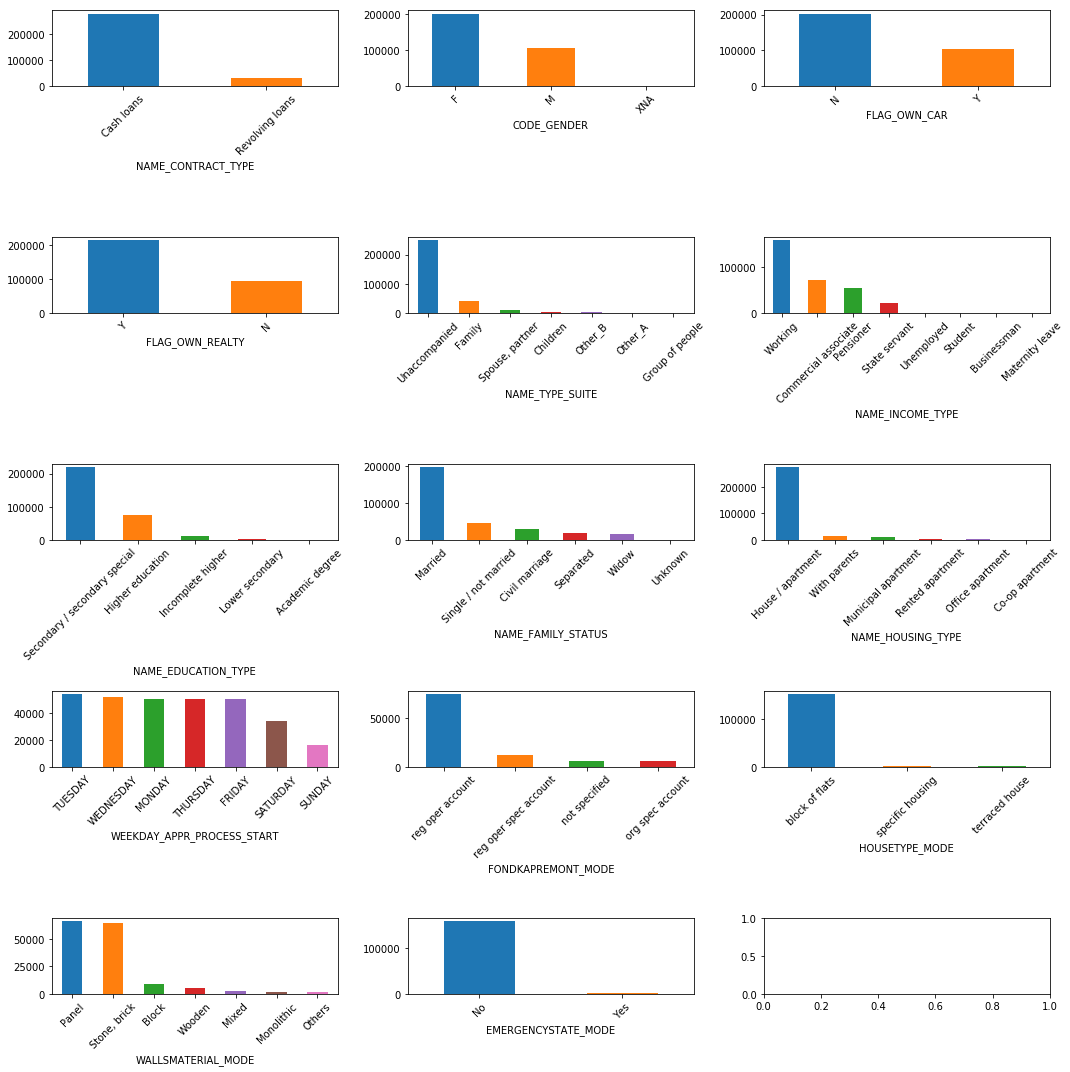

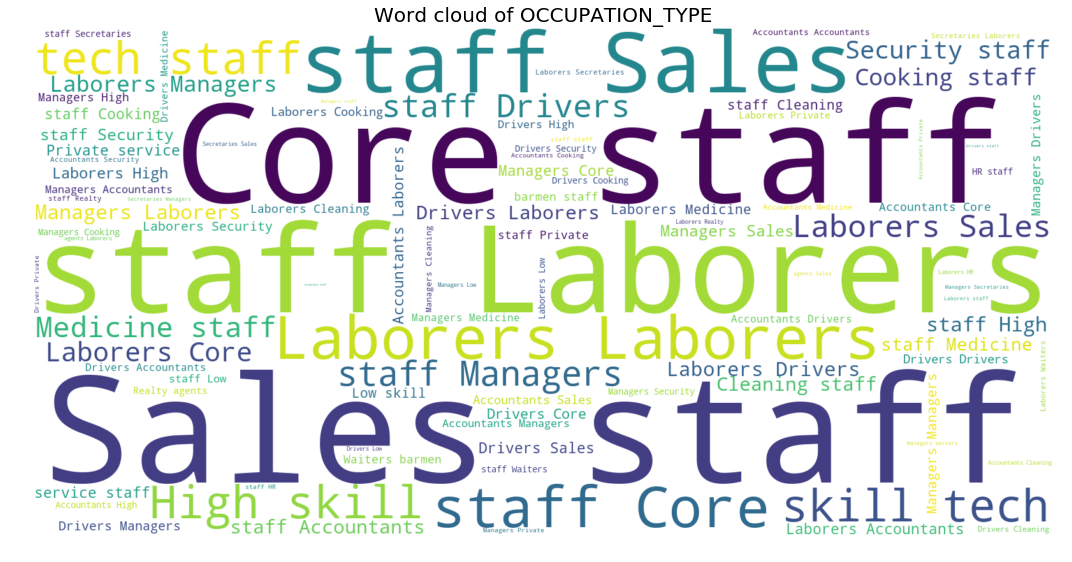

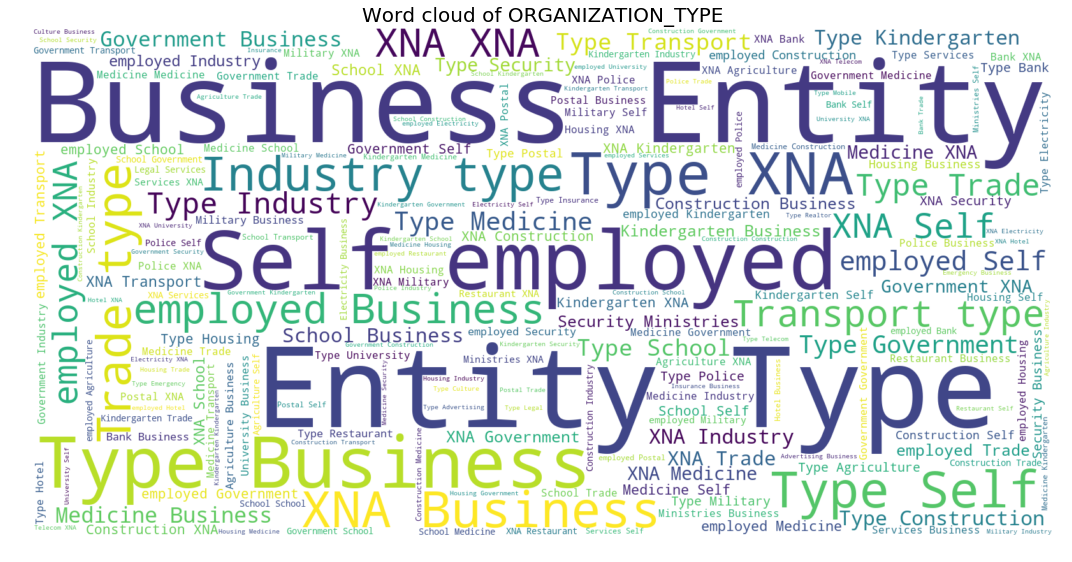

In [61]:
# ve grid -bar : 1 list name
def grid_bar_charts(pdf, ls_cname, ncols = 3):
    """
    Vẽ nhiều bar chart cho các thuộc tính được xếp vào grid
    Cho số lượng grid column, ta sẽ fill out bar chart cho từng cell của grid
    """
    
    # tính số dòng cần cho grid
    n_cat = len(ls_cname)    
    nrows = int(math.ceil(n_cat * 1.0 / ncols))

    # khởi tạo figure gồm nrows * ncols cho grid
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 3 * nrows))
    
    # dùng tuỳ chọn này để các chart được rời nhau
    fig.set_tight_layout(False)
    
    # fill out grid
    for i in range(nrows):
        for j in range(ncols):
            # xác định vị trí tên column trong danh sách dựa vào (i, j, ncols)
            idx = i * ncols + j
            
            # khi plot hết thì dừng
            if idx == n_cat:
                break
                
            # lấy tên column cần plot
            cname = ls_cname[idx]
            s00 = pdf[~pdf[cname].isna()]
            s00 = s00.groupby(cname).size()
            
            # sắp giá trị giảm dần trước khi plot
            s00.sort_values(ascending=False).plot.bar(ax=axes[i][j], rot=45)

    # plot grid
    plt.tight_layout()
    plt.show()
    
#     
def plot_wordcloud(pdf, ls_cname):
    """
    Vẽ wordcloud cho biến có nhiều giá trị categories
    """
    
    for cname in ls_cname:
        # get sequence of types
        s00 = pdf[~pdf[cname].isna()][cname]
        text = " ".join(s00.astype(str).tolist())

        # generate wordcloud
        wordcloud = WordCloud(background_color="white", width=1600, height=800).generate(text)

        # 
        fig, ax = plt.subplots(figsize=(15, 15))
        fig.set_tight_layout(False)
        
        # plot wordcloud
        ax.imshow(wordcloud, interpolation="bilinear")
        ax.axis("off")
        ax.set_title("Word cloud of {}".format(cname), fontsize=20)
        
        #
        plt.tight_layout()
        plt.show()    
        
# 
# 
def grid_histogram(pdf, ls_cname, ncols = 3):
    """
    Vẽ nhiều histogram cho các thuộc tính được xếp vào grid
    Cho số lượng grid column, ta sẽ fill out histogram cho từng cell của grid
    """
    
    # tính số dòng cần cho grid
    n_cat = len(ls_cname)    
    nrows = int(math.ceil(n_cat * 1.0 / ncols))

    # khởi tạo figure gồm nrows * ncols cho grid
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))
    
    # dùng tuỳ chọn này để các chart được rời nhau
    fig.set_tight_layout(False)
    
    # fill out grid
    for i in range(nrows):
        for j in range(ncols):
            
            # xác định vị trí tên column trong danh sách dựa vào (i, j, ncols)
            idx = i * ncols + j
            
            # khi plot hết thì dừng
            if idx == n_cat:
                break
                
            cname = ls_cname[idx]
            s00 = pdf[~pdf[cname].isna()][cname]
            s00.plot(kind="hist", ax=axes[i][j], rot=45, title=cname)
            
    plt.tight_layout()
    plt.show()        
    
# 
# 
def plot_continuous_data(s00, title):
    """
    Quan sát continuous data bằng histogram và boxplot
    """
    
    # khởi tạo figure
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    # plot
    s00.hist(bins=30, ax=ax1)
    s00.plot.box(ax=ax2)
    
    #
    plt.suptitle(title)
    plt.show()
# 
ls_cat_name = pdf_meta[pdf_meta['sub_type']=='object']['name'].tolist()
print (ls_cat_name)
# if number of category is small we could use bar chart, otherwise use cloud chart
pdf_meta00 = pdf_meta[pdf_meta['name'].isin(ls_cat_name)][['name','n_distinct']]
pdf_meta00['chart'] = pdf_meta00['n_distinct'].apply( lambda x: 'wordcloud'if int(x.split()[0])>10 else 'bar')
pdf_meta00

# ve cac bieu do bar
# ls_cat_bar = pdf_meta00[pdf_meta00['chart']=='bar']['name'].tolist()
ls_cat_bar = pdf_meta00.query("chart == 'bar'")["name"].tolist()
ls_cat_wordcloud = pdf_meta00[pdf_meta00['chart']=='wordcloud']['name'].tolist()
grid_bar_charts(pdf_data,ls_cat_bar)
plot_wordcloud(pdf_data, ls_cat_wordcloud)

In [55]:
# check numerical data attributes
ls_num_name = pdf_meta[pdf_meta['sub_type']=='int64']['name'].tolist()
ls_num_name

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [56]:
pdf_meta01 = pdf_meta[pdf_meta['name'].isin(ls_num_name)][['name','n_distinct']]
pdf_meta01['chart'] = pdf_meta['n_distinct'].apply(lambda x: "histogram" if int(x.split()[0])>10 else "bar")
pdf_meta01

,name,n_distinct,chart
0,SK_ID_CURR,307511 (100.00%),histogram
1,TARGET,2 (0.00%),bar
6,CNT_CHILDREN,15 (0.00%),histogram
17,DAYS_BIRTH,17460 (5.68%),histogram
18,DAYS_EMPLOYED,12574 (4.09%),histogram
20,DAYS_ID_PUBLISH,6168 (2.01%),histogram
22,FLAG_MOBIL,2 (0.00%),bar
23,FLAG_EMP_PHONE,2 (0.00%),bar
24,FLAG_WORK_PHONE,2 (0.00%),bar
25,FLAG_CONT_MOBILE,2 (0.00%),bar


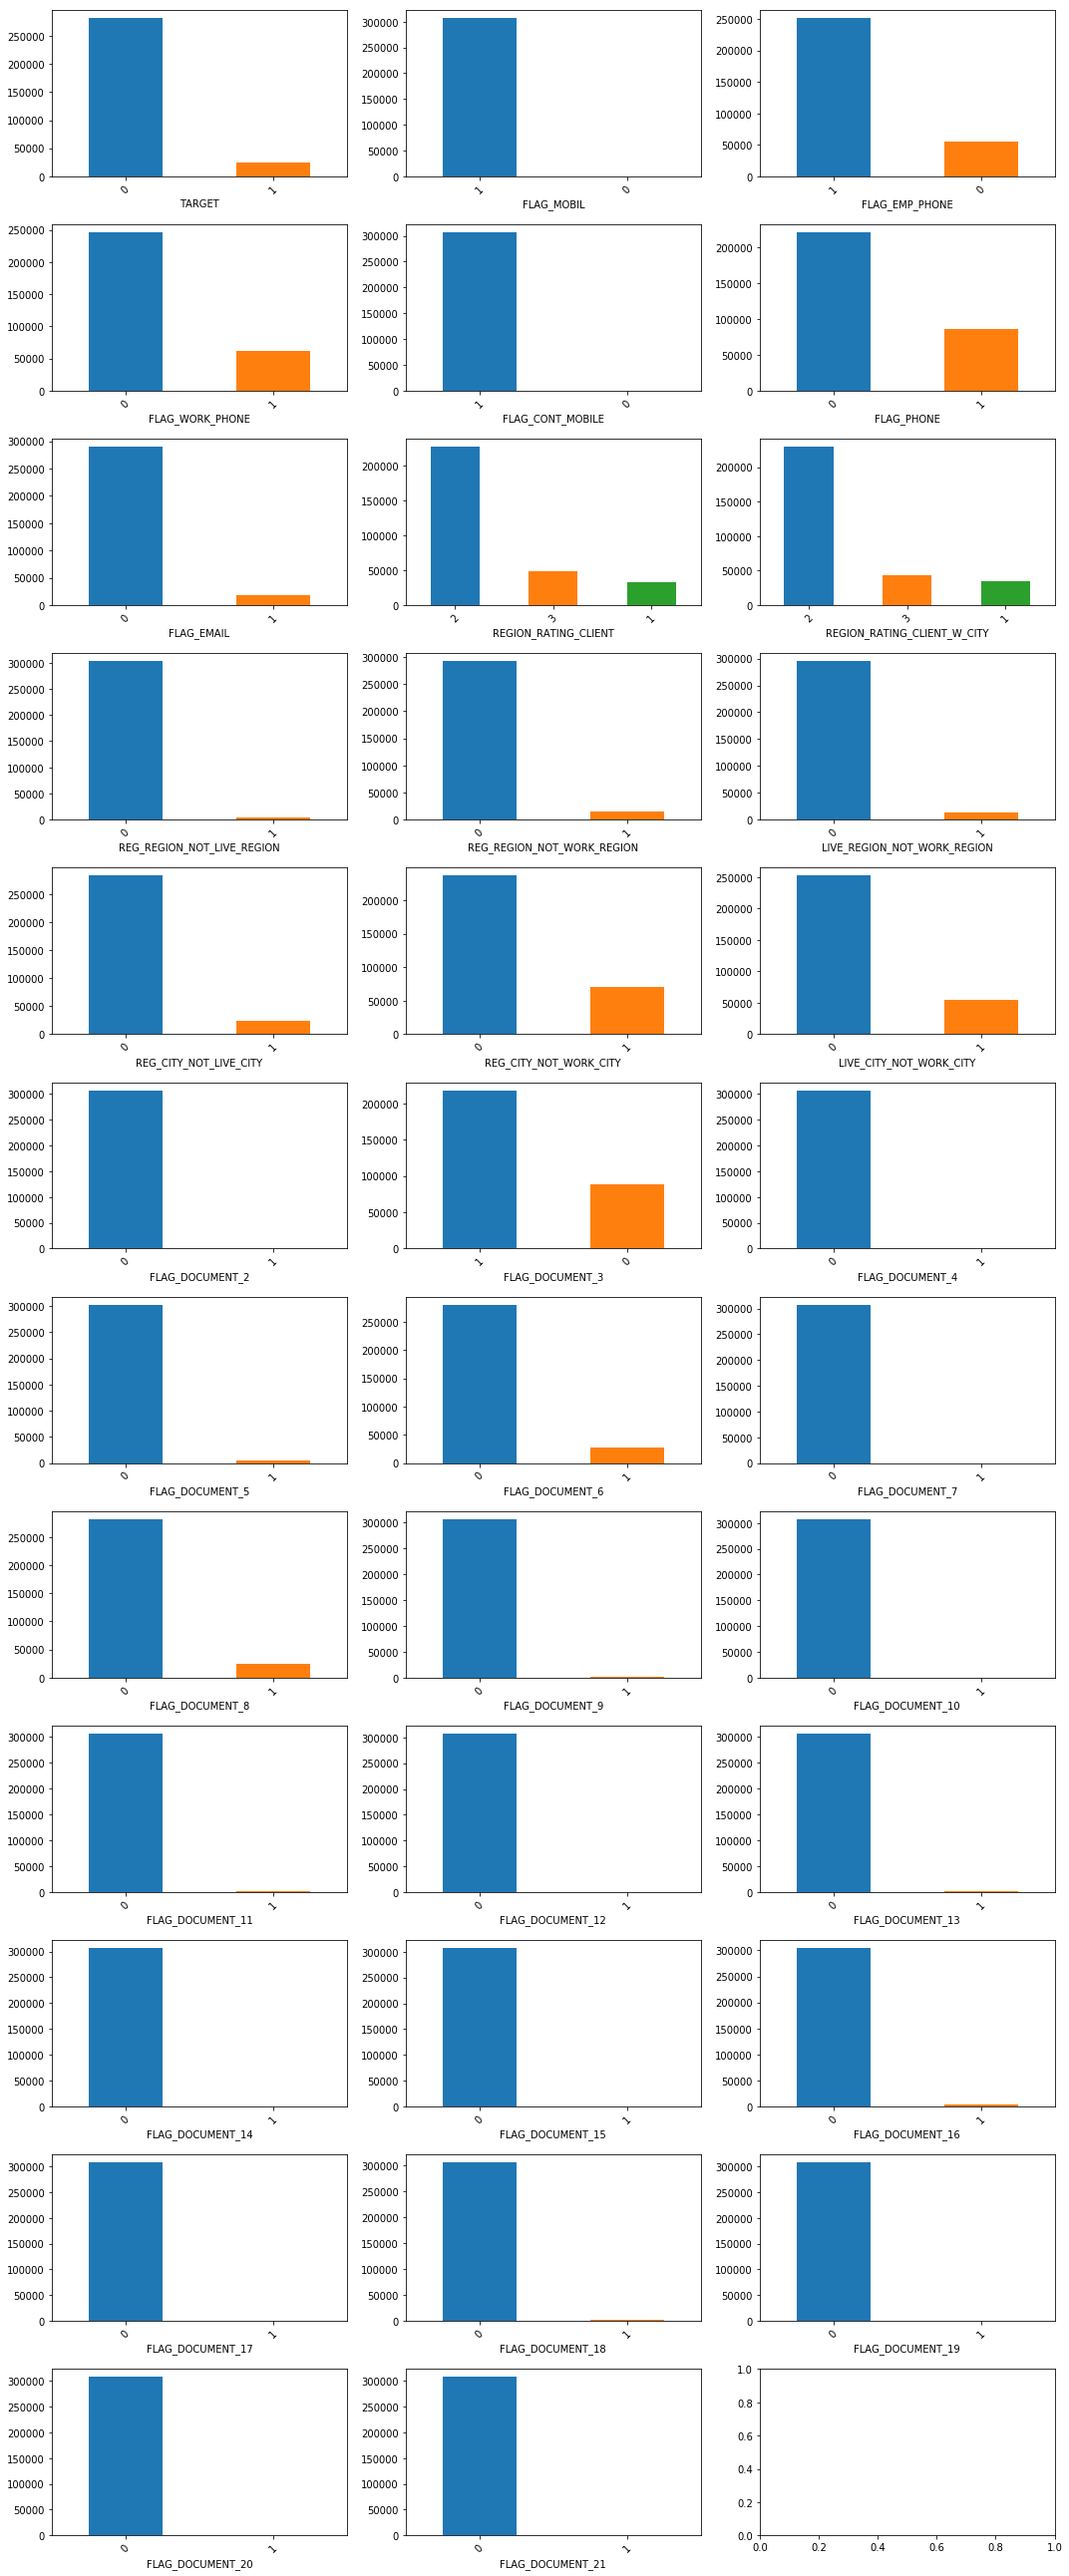

In [59]:
ls_num_bar = pdf_meta01[pdf_meta01['chart']=='bar']['name'].tolist()
grid_bar_charts(pdf_data, ls_num_bar)

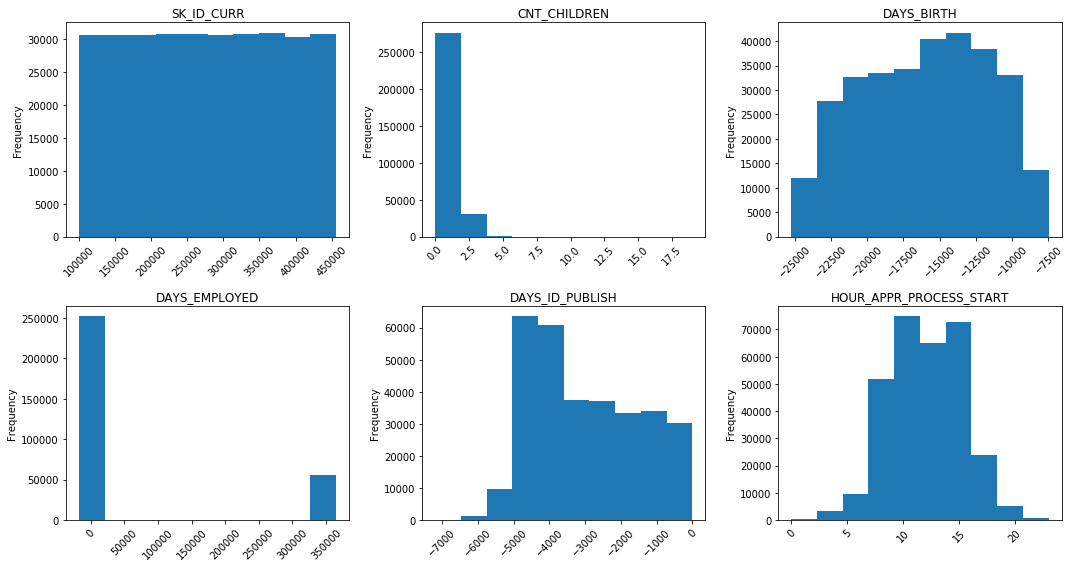

In [62]:
ls_num_histogram =pdf_meta01[pdf_meta01['chart']=='histogram']['name'].tolist()
grid_histogram(pdf_data, ls_num_histogram)

In [63]:
# check continuous data attributes
ls_continuous_name = pdf_meta[pdf_meta["sub_type"] == "float64"]["name"].tolist()
ls_continuous_name

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

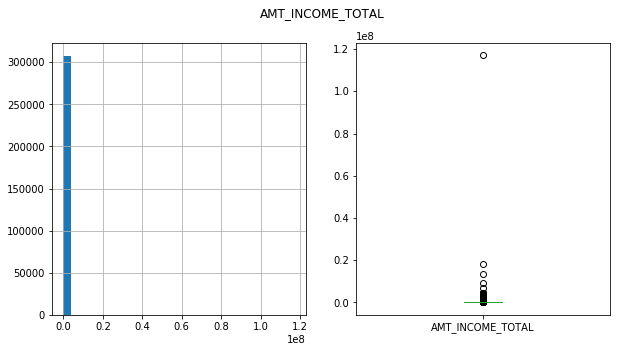

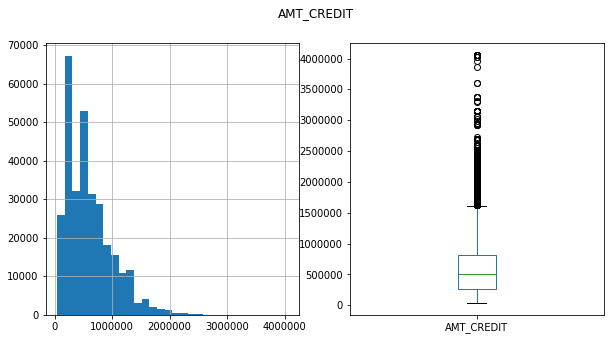

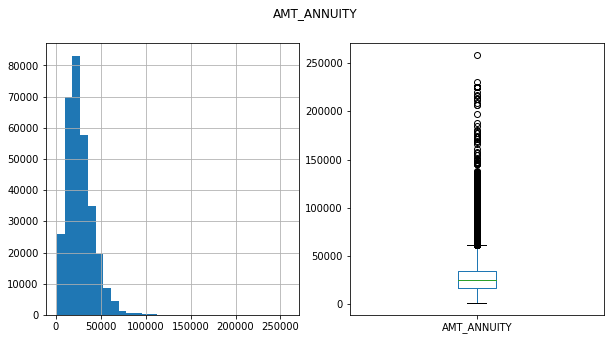

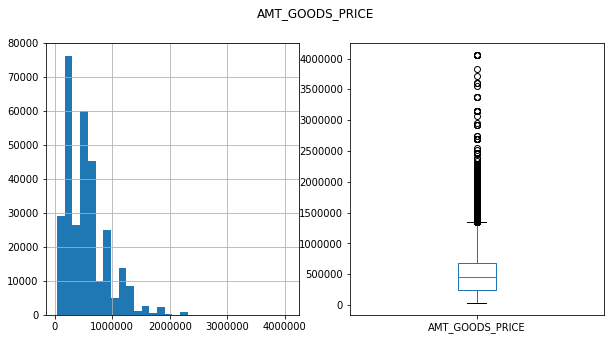

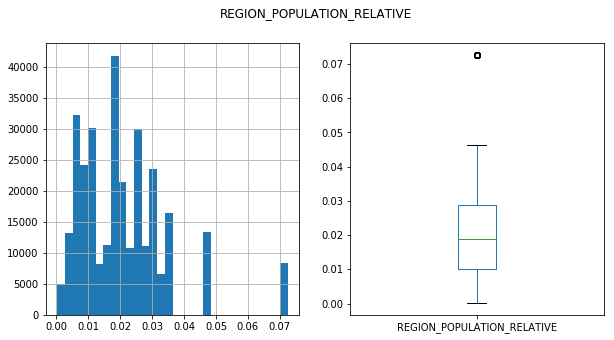

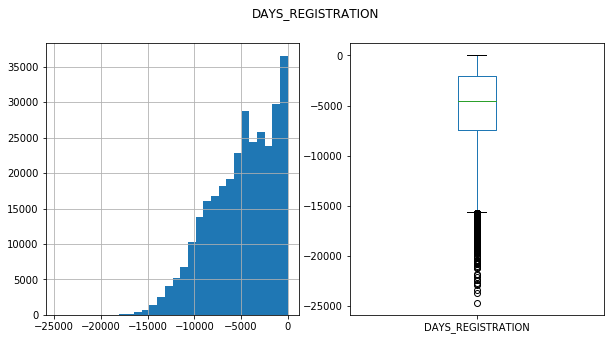

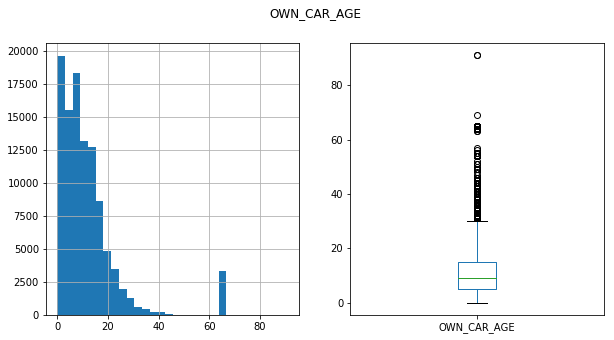

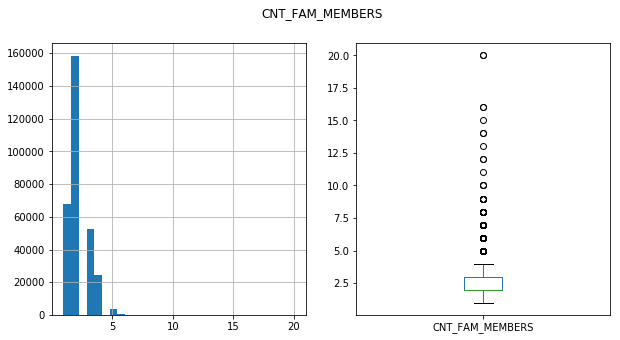

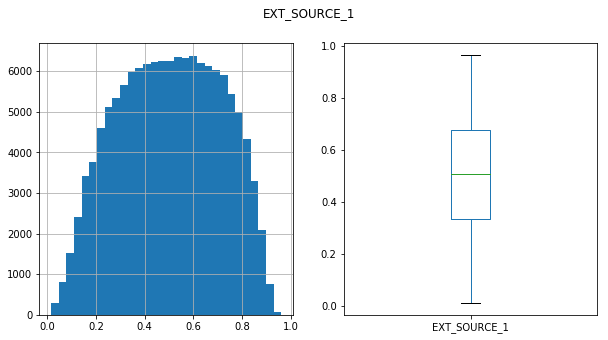

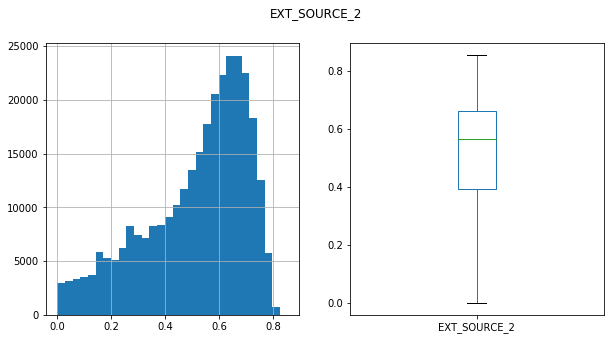

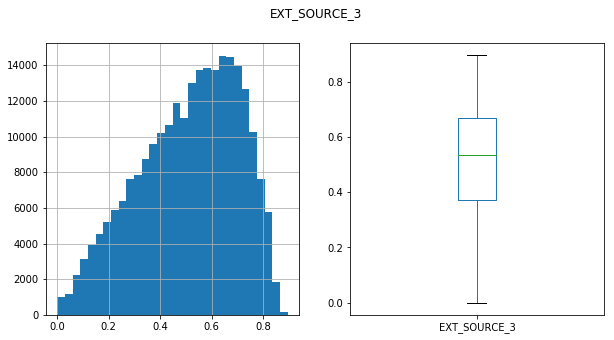

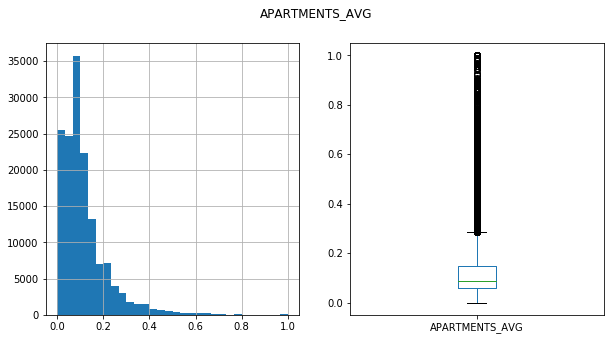

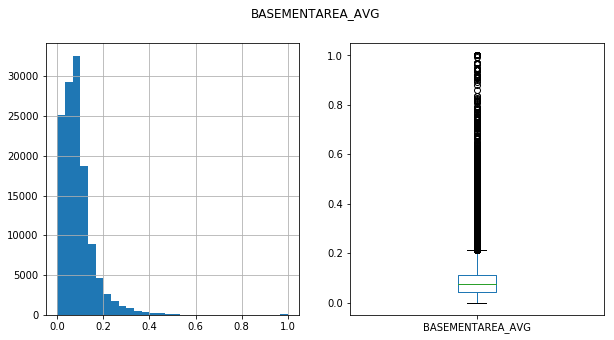

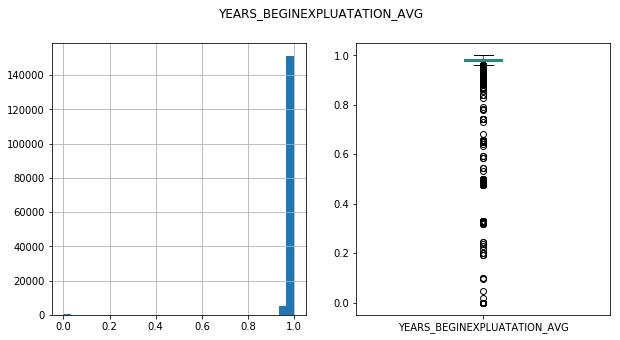

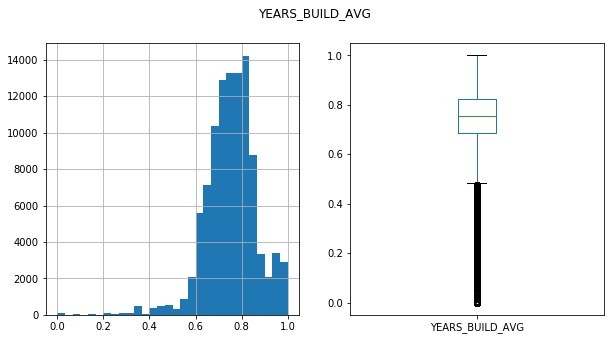

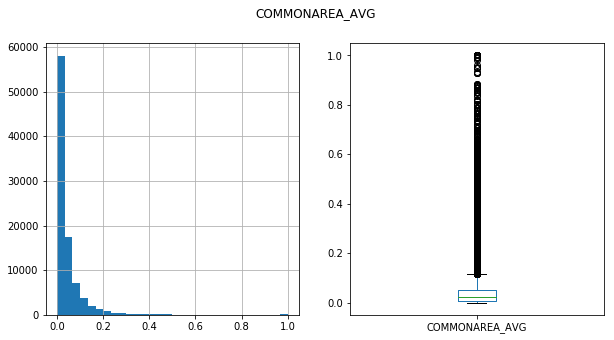

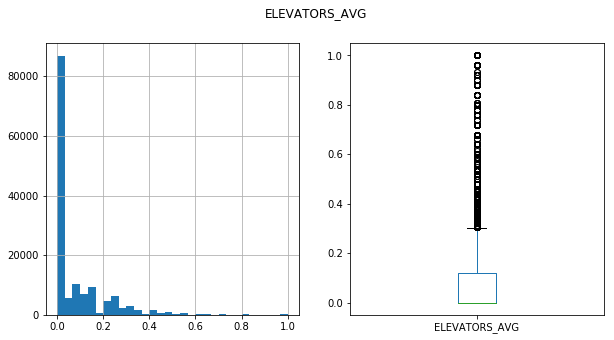

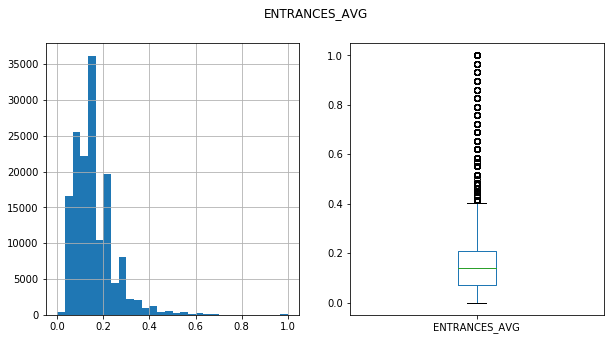

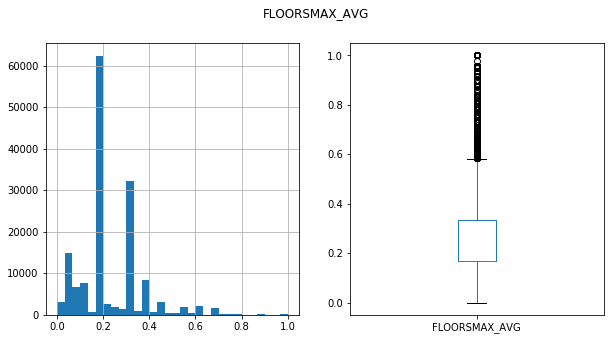

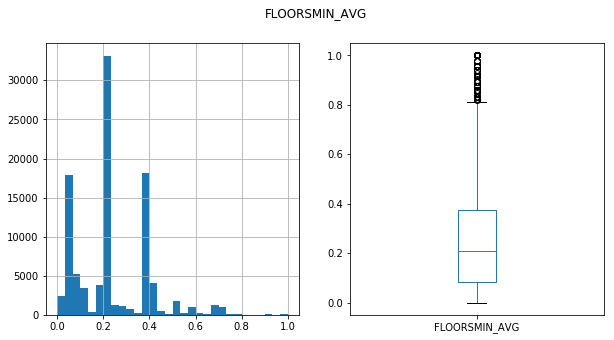

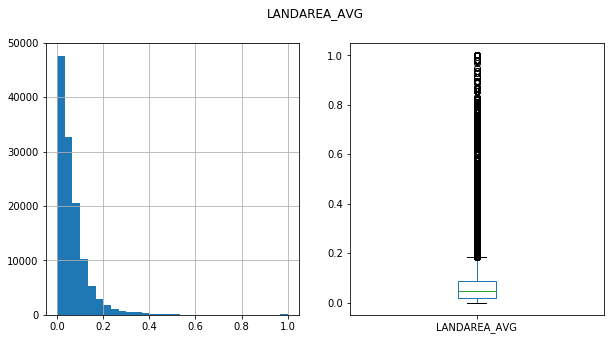

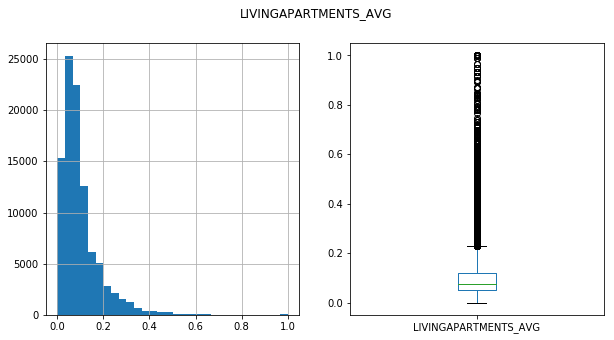

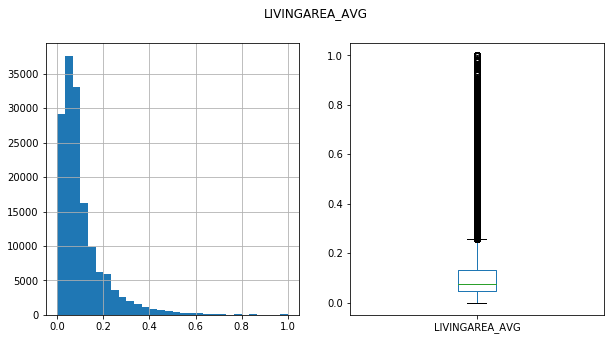

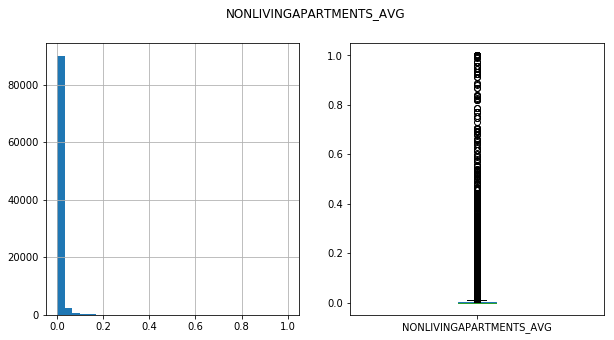

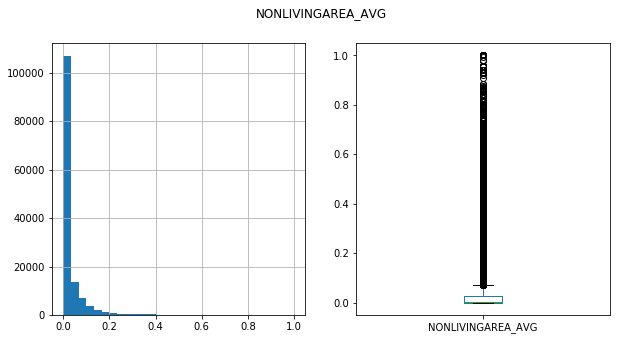

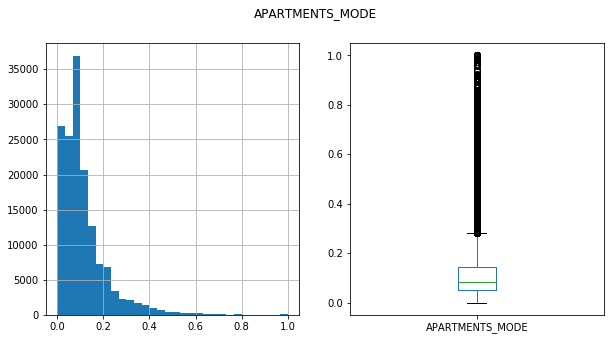

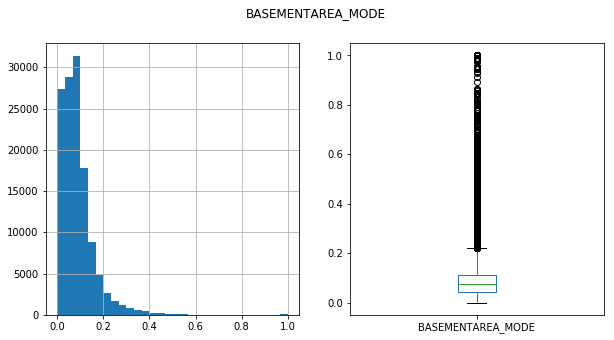

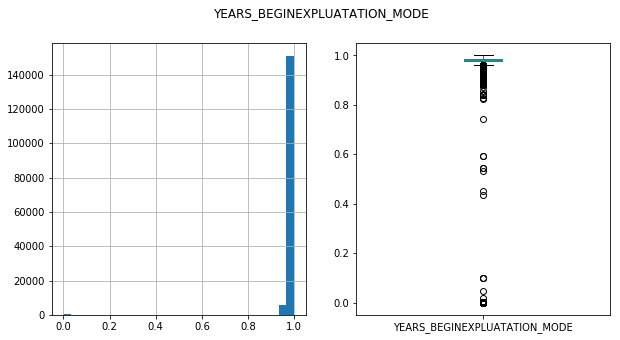

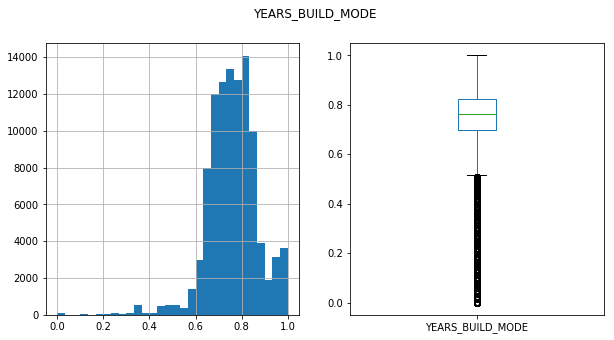

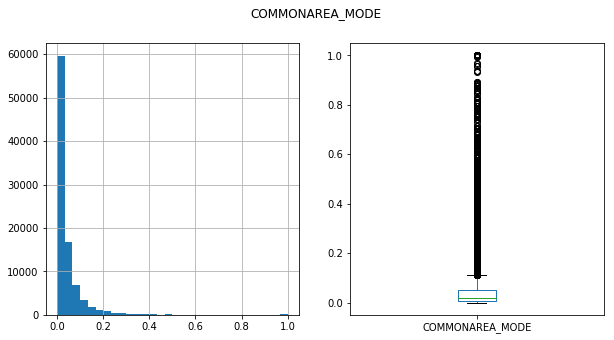

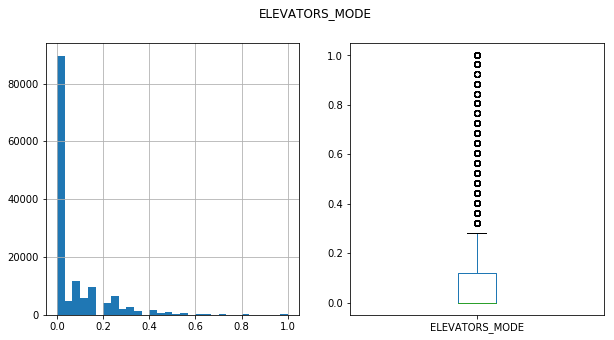

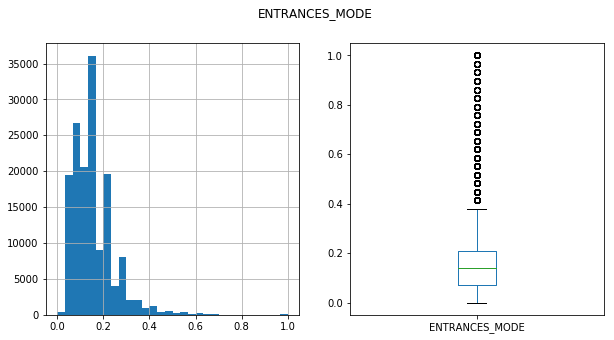

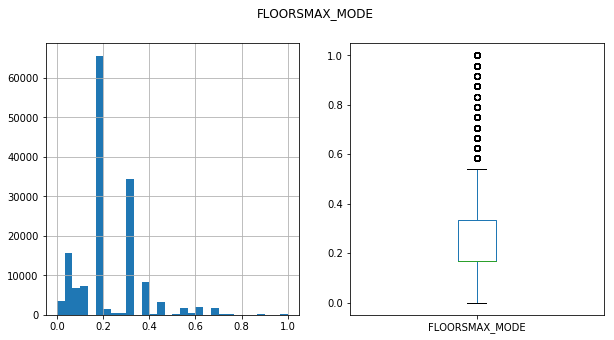

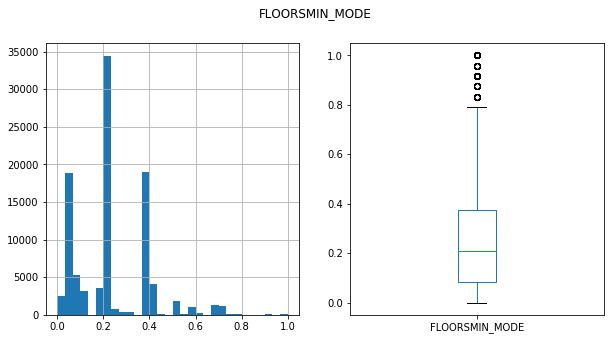

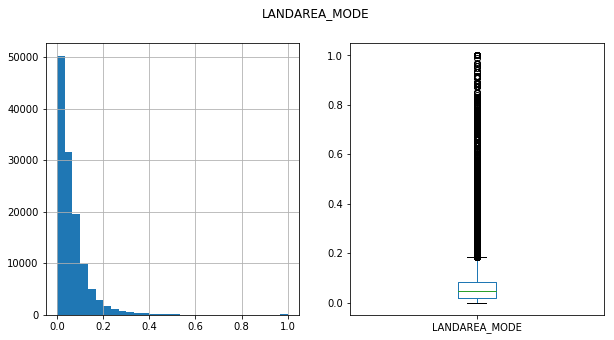

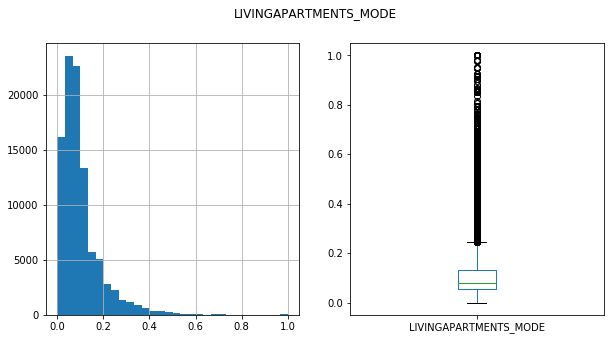

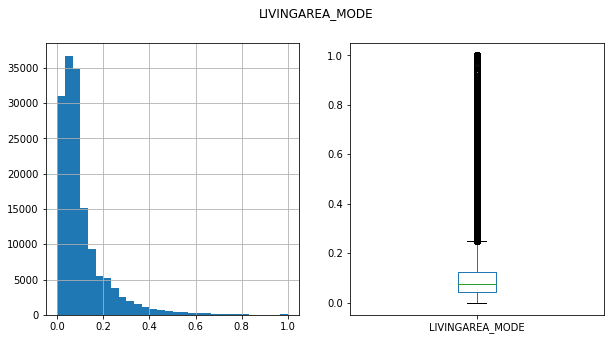

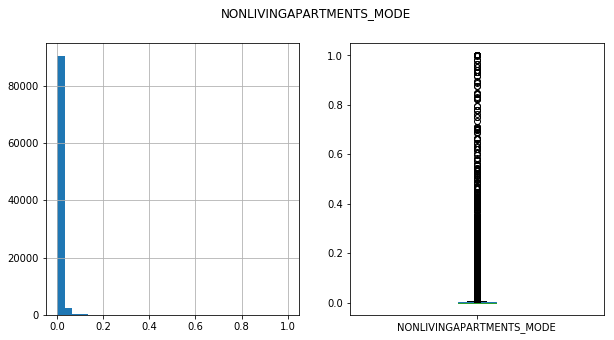

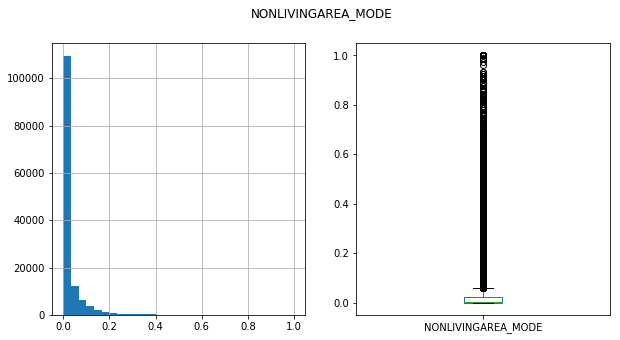

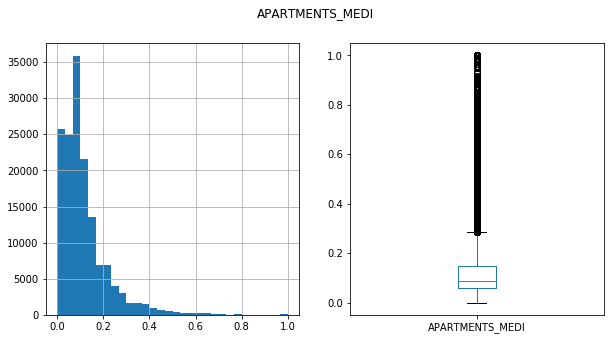

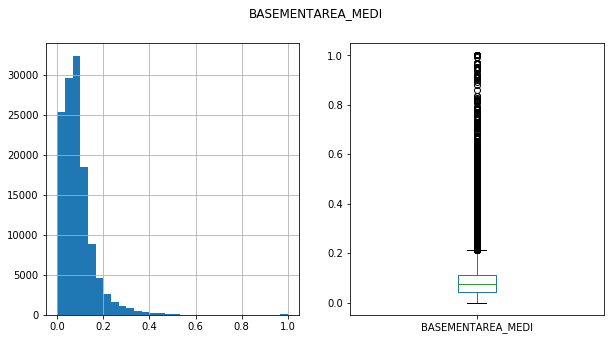

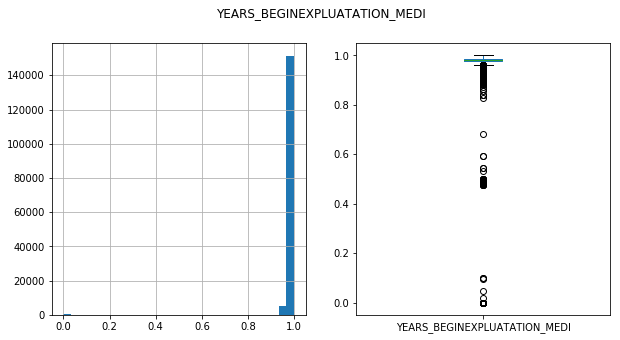

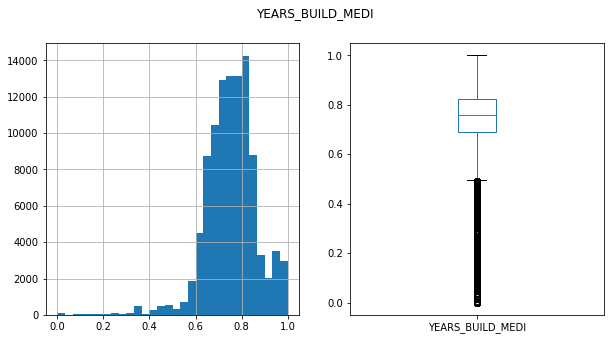

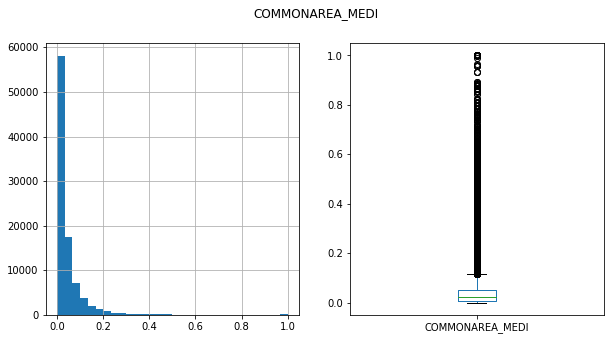

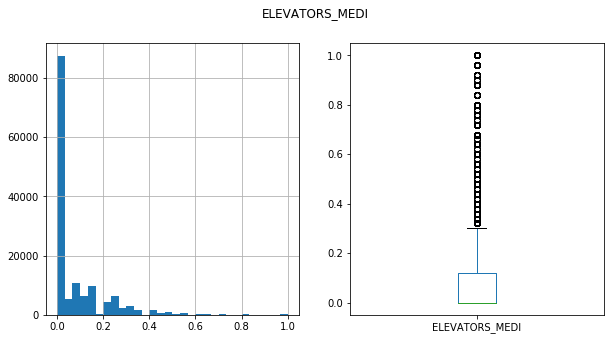

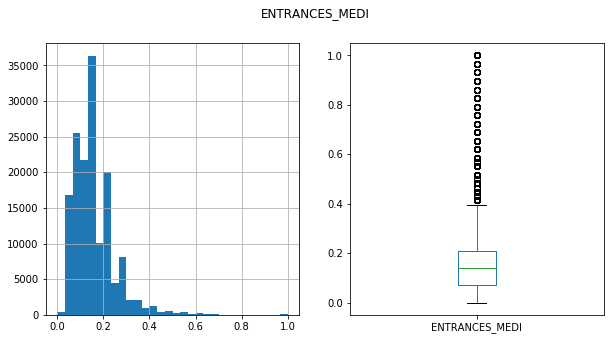

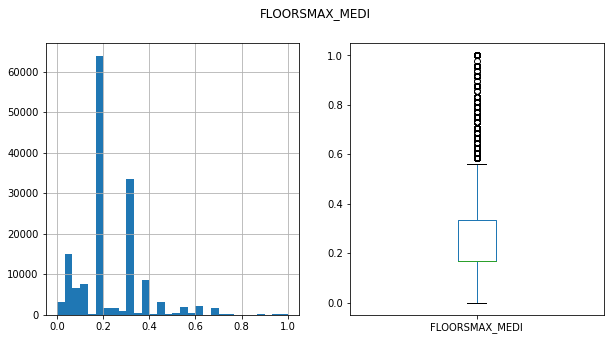

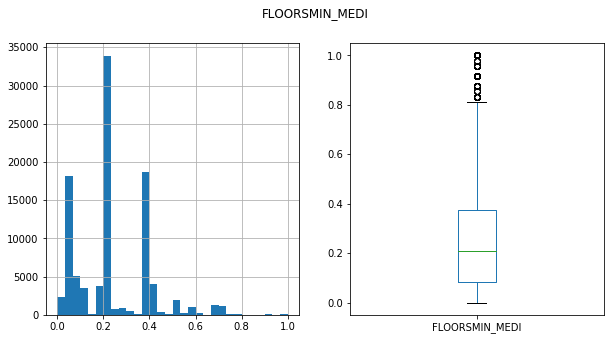

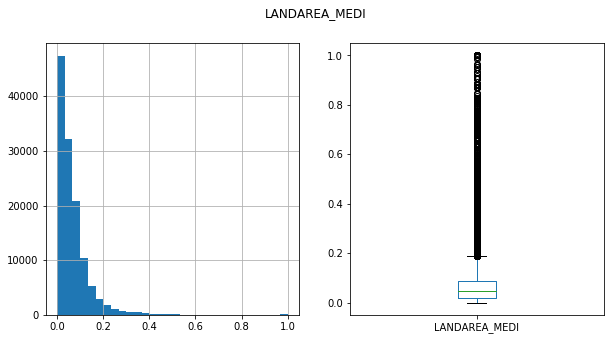

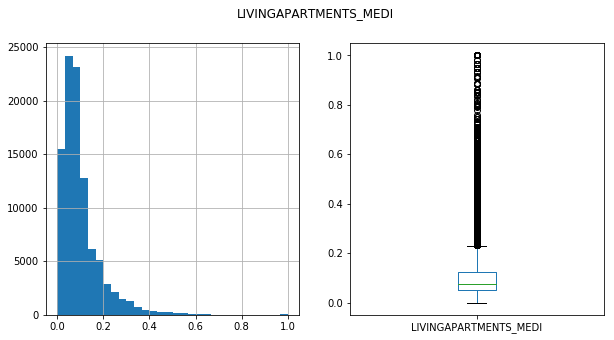

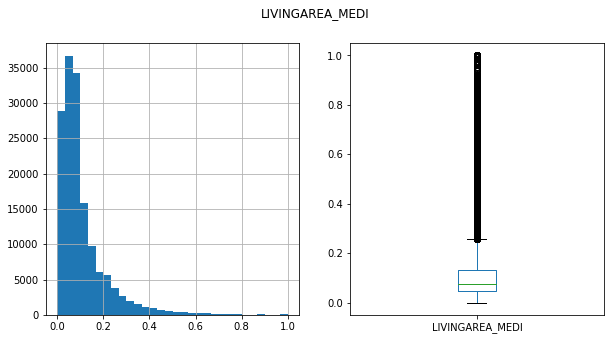

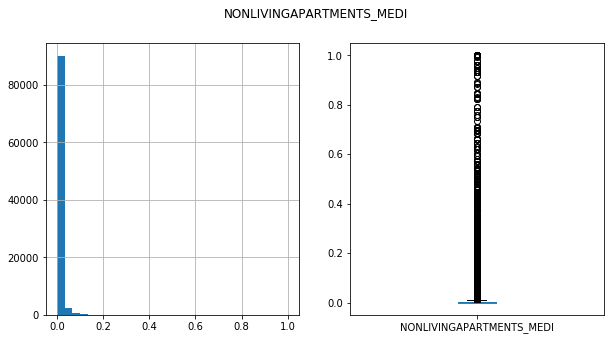

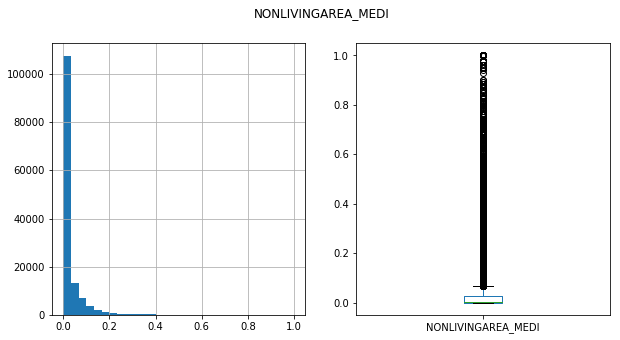

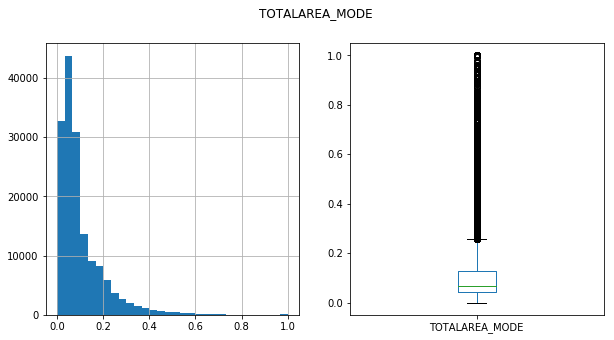

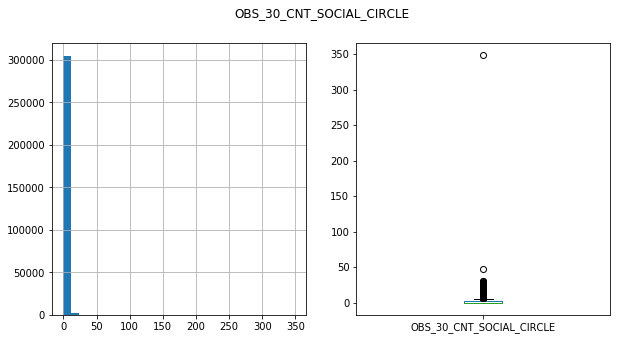

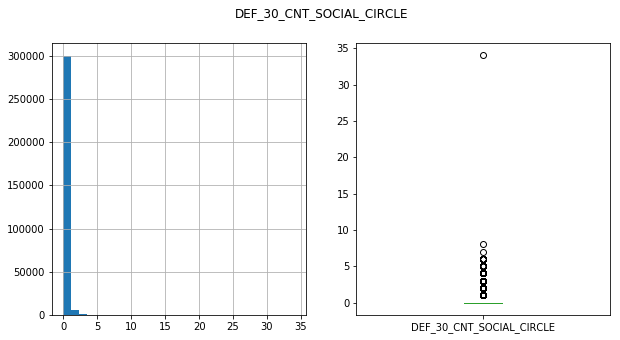

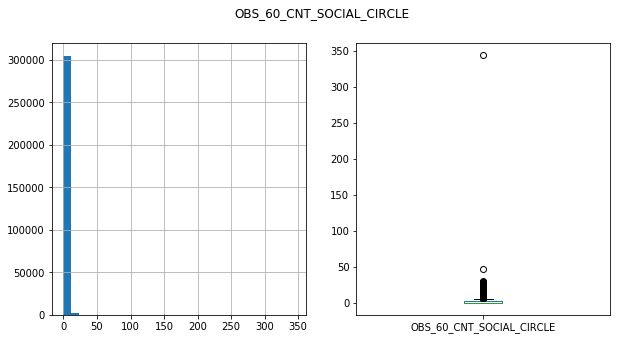

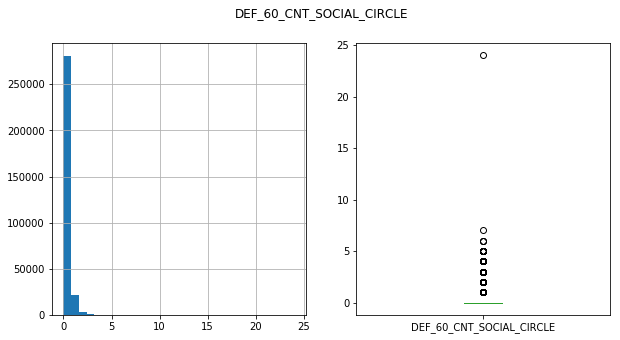

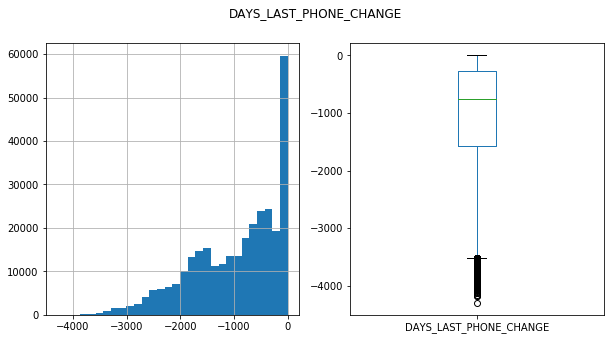

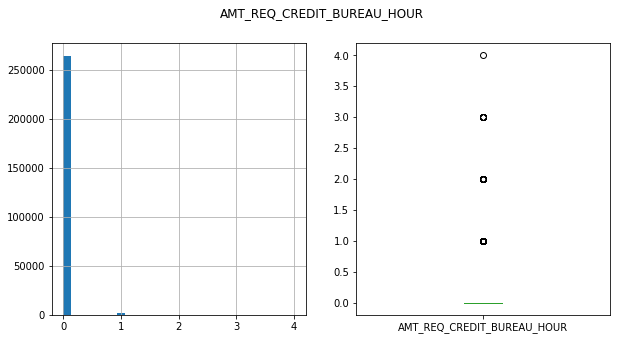

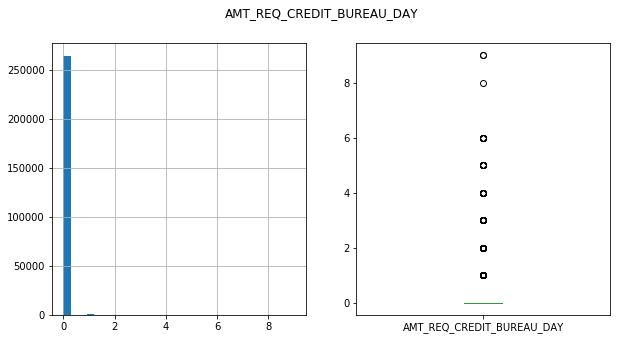

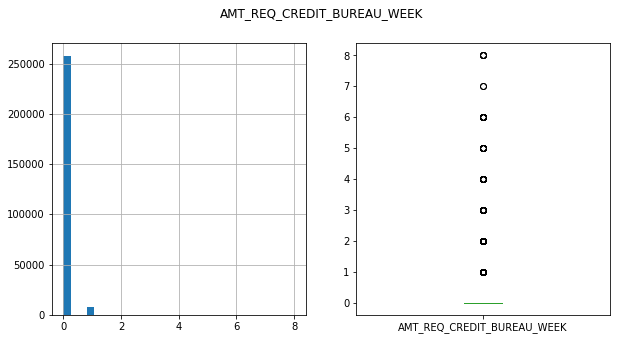

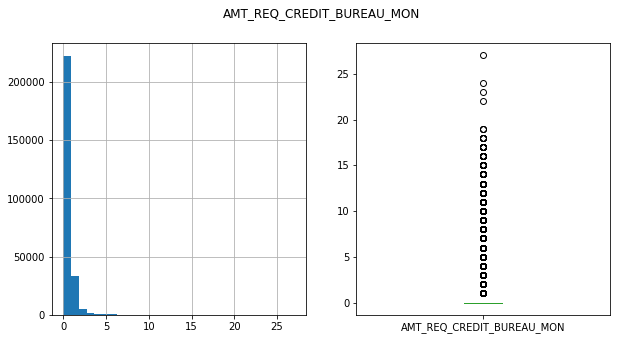

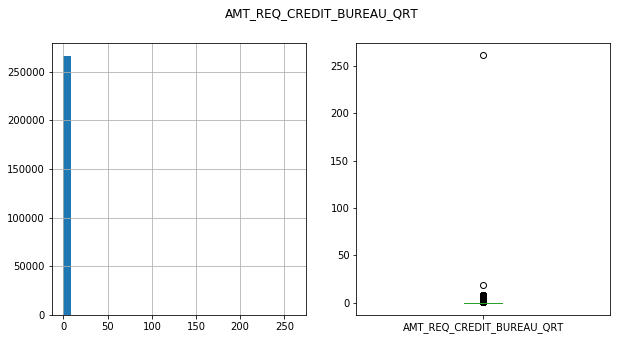

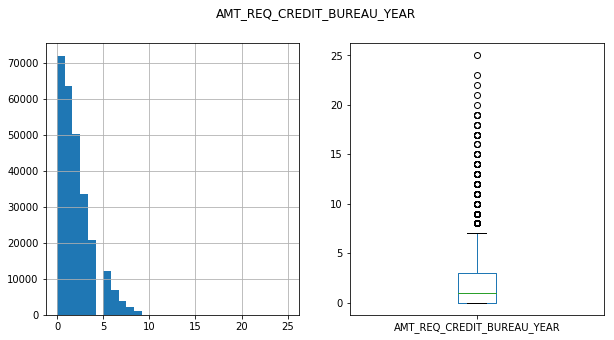

In [64]:
for cname in ls_continuous_name:
    s00 = pdf_data[~pdf_data[cname].isna()][cname]    
    plot_continuous_data(s00, cname)